In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv(r'/content/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df.shape

(4340, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


We will now check for missing and duplicate values, and convert the datatypes of columns as required.

In [15]:
df.duplicated().sum()
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


We will now check the categories for the categorical columns

In [16]:
print(df['owner'].value_counts())
print(df['fuel'].value_counts())
print(df['transmission'].value_counts())
print(df['seller_type'].value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


We will also check the distribution of numerical data

In [17]:
print(df['year'].describe())
print(df['selling_price'].describe())

count    4340.000000
mean     2013.090783
std         4.215344
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64
count    4.340000e+03
mean     5.041273e+05
std      5.785487e+05
min      2.000000e+04
25%      2.087498e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Performing univariate EDA:

<Axes: xlabel='count', ylabel='owner'>

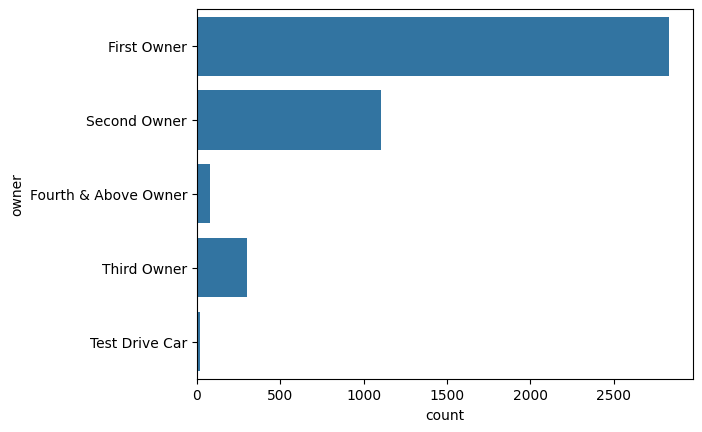

In [19]:
sns.countplot(df['owner'])

<Axes: xlabel='count', ylabel='seller_type'>

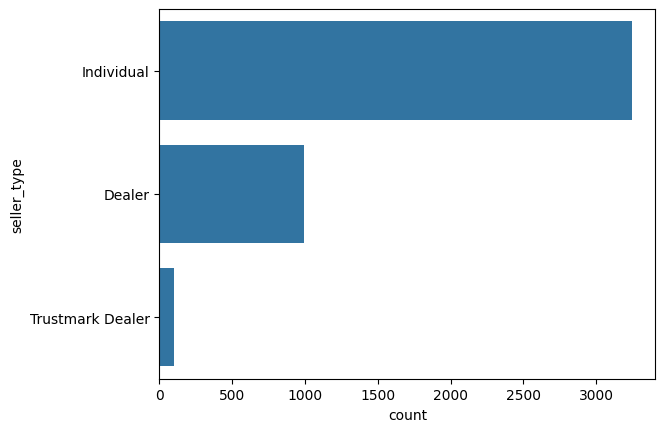

In [20]:
sns.countplot(df['seller_type'])

<Axes: xlabel='count', ylabel='transmission'>

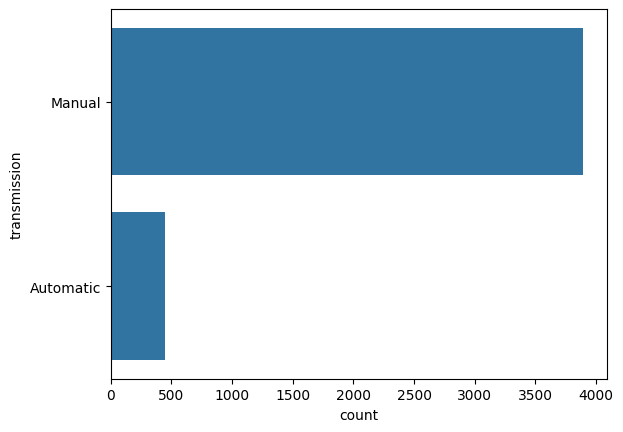

In [21]:
sns.countplot(df['transmission'])

<Axes: xlabel='count', ylabel='seller_type'>

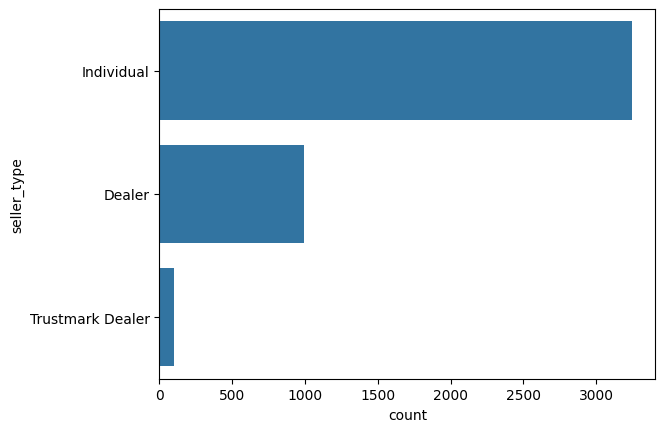

In [22]:
sns.countplot(df['seller_type'])

<Axes: xlabel='selling_price', ylabel='Density'>

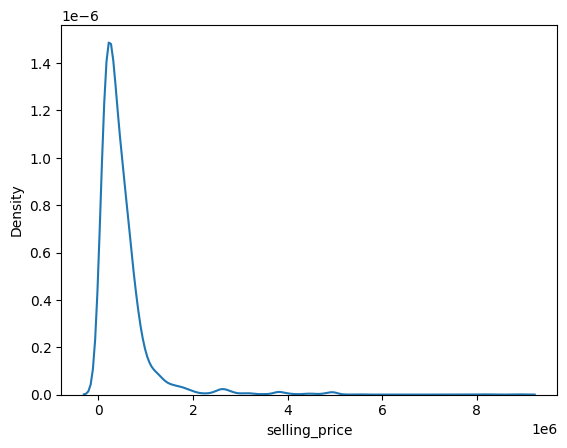

In [23]:
sns.kdeplot(df['selling_price'])

Performing multivariate EDA:

<Axes: xlabel='owner', ylabel='selling_price'>

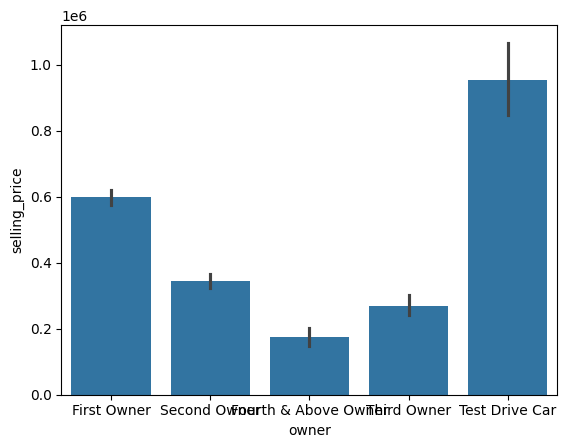

In [24]:
sns.barplot(data=df, x='owner', y='selling_price')

<Axes: xlabel='transmission', ylabel='selling_price'>

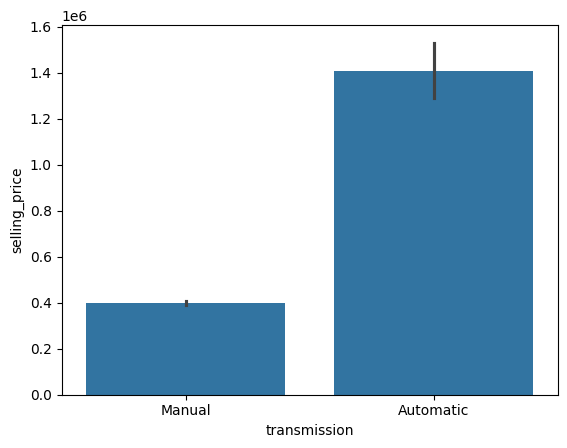

In [25]:
sns.barplot(data=df, x='transmission', y='selling_price')

<Axes: xlabel='seller_type', ylabel='selling_price'>

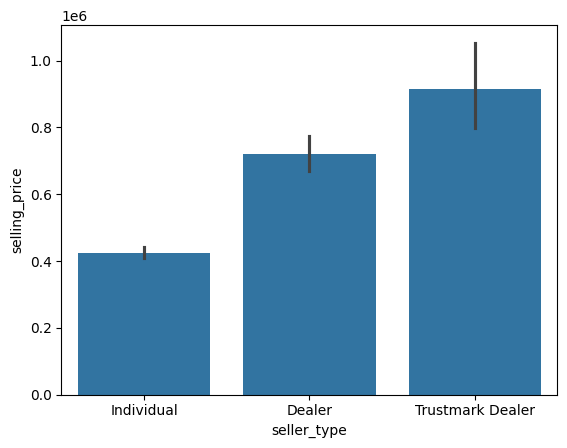

In [26]:
sns.barplot(data=df, x='seller_type', y='selling_price')

<Axes: xlabel='km_driven', ylabel='selling_price'>

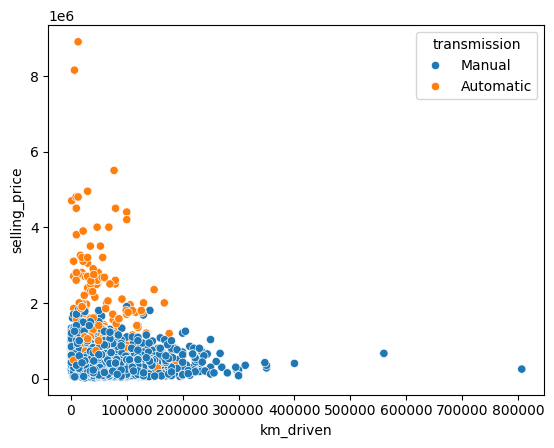

In [27]:
sns.scatterplot(data=df, x='km_driven', y='selling_price', hue='transmission')

Converting the categorical columns to numerical categories

In [28]:
df['owner']=df['owner'].map({'Test Drive Car':5, 'First Owner':4, 'Second Owner':3, 'Third Owner':2, 'Fourth & Above Owner':1})
df['transmission']=df['transmission'].map({'Manual':1, 'Automatic':2})
df['seller_type']=df['seller_type'].map({'Individual':1, 'Dealer':2, 'Trustmark Dealer':3})

Capping the top and bottom 1 percentile outliers in selling price

In [29]:
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['selling_price'] < (Q1 - 1.5 * IQR)) | (df['selling_price'] > (Q3 + 1.5 * IQR))
lower_bound = df['selling_price'].quantile(0.01)
upper_bound = df['selling_price'].quantile(0.99)

df['selling_price'] = df['selling_price'].clip(lower=lower_bound, upper=upper_bound)

In [30]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,1,1,4
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,1,1,4
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,1,4
3,Datsun RediGO T Option,2017,250000,46000,Petrol,1,1,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,1,3


Scaling the selling price

In [31]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
curr=2025
df['age']=curr-df['year']
df.drop(columns=['year'], axis=1, inplace=True)
df[['km_driven', 'age']] = mms.fit_transform(df[['km_driven', 'age']])

Performing log transformation on columns to normalise them

In [32]:
df = pd.get_dummies(df, columns=['fuel'])
df['selling_price'] = np.log1p(df['selling_price'])
df['km_driven'] = np.log1p(df['km_driven'])
df['age'] = np.log1p(df['age'])

On seeing the graph of age and km_driven against selling price, some non linear properties are observed:

<Axes: xlabel='age', ylabel='selling_price'>

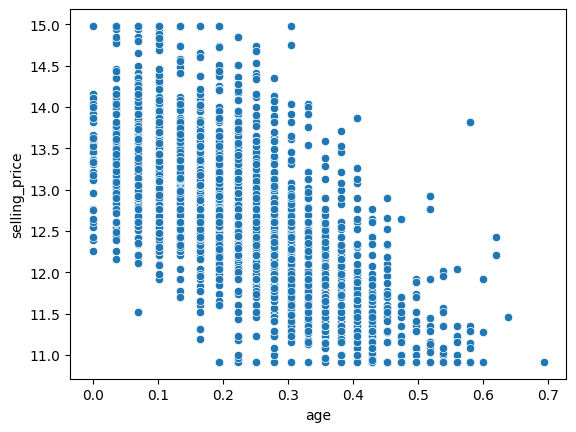

In [33]:
sns.scatterplot(data=df, x='age', y='selling_price')

<Axes: xlabel='km_driven', ylabel='selling_price'>

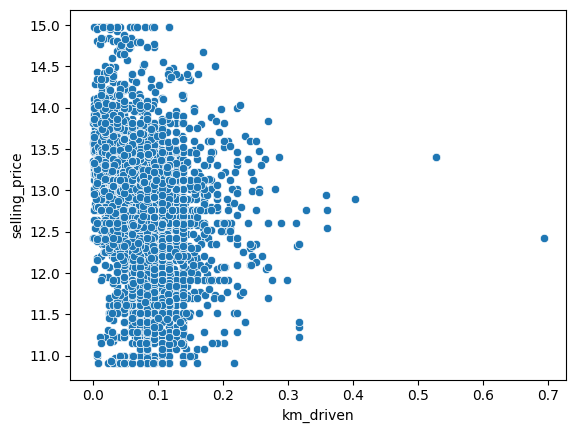

In [34]:
sns.scatterplot(data=df, x='km_driven', y='selling_price')

Addition of polynomial features upto degree 2 to both of these columns so that non linearity in data is captured by the model

In [35]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures(degree=2, include_bias=False)
poly=['age', 'km_driven']
xp=pf.fit_transform(df[poly])
xpdf=pd.DataFrame(xp, columns=pf.get_feature_names_out(poly))
df=df.drop(columns=poly)
df=pd.concat([df, xpdf], axis=1)

Splitting the data into training and testing sets for model training and evaluation


In [36]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['name','selling_price'], axis=1)
y=df['selling_price']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)

(3472, 13)


In [37]:
from sklearn.linear_model import Lasso, LinearRegression, ElasticNet, Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

Since the data seems to be linear, trying linear regression

In [38]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
# print(r2_score(y_test, y_pred))
print(cross_val_score(lr, X, y, cv=5, scoring='r2').mean())

0.6863322356784562


Trying Lasso and Ridge regression techniques to improve the accuracy

In [39]:
ll=Lasso(alpha=0.001)
ll.fit(X_train, y_train)
y_pred2=ll.predict(X_test)
print(cross_val_score(ll, X, y, cv=5, scoring='r2').mean())

0.6861404268889173


In [40]:
rr=Ridge(alpha=0.001)
rr.fit(X_train, y_train)
y_pred2=rr.predict(X_test)
print(cross_val_score(rr, X, y, cv=5, scoring='r2').mean())

0.6863440479074804


Since both Lasso and Ridge regressions have equal accuracies, trying Elastic Net regression wont make any difference, therefore trying Bagging techniques to improve the model:

In [41]:
from sklearn.ensemble import BaggingRegressor

bg_lr = BaggingRegressor(estimator=LinearRegression(),n_estimators=10,max_samples=0.8,max_features=0.8,bootstrap=True,bootstrap_features=False,random_state=42)
bg_lr.fit(X_train, y_train)
y_pred3 = bg_lr.predict(X_test)
print(cross_val_score(bg_lr, X, y, cv=5, scoring='r2').mean())

0.6828378520524292


In [42]:
bg_lasso = BaggingRegressor(estimator=Lasso(alpha=0.001),n_estimators=10,max_samples=0.8,max_features=0.8,bootstrap=True,bootstrap_features=False,random_state=42)
bg_lasso.fit(X_train, y_train)
y_pred4 = bg_lasso.predict(X_test)
print(cross_val_score(bg_lasso, X, y, cv=5, scoring='r2').mean())

0.6805309380021651


Since bagging isnt making much of a difference, trying Random Forest as well as XGBoost

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(cross_val_score(rf, X, y, cv=5, scoring='r2').mean())

0.7098927027252794


In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(cross_val_score(xgb, X, y, cv=5, scoring='r2').mean())

0.7162239487914048


Plotting residuals to understand their distribution and potential improvements

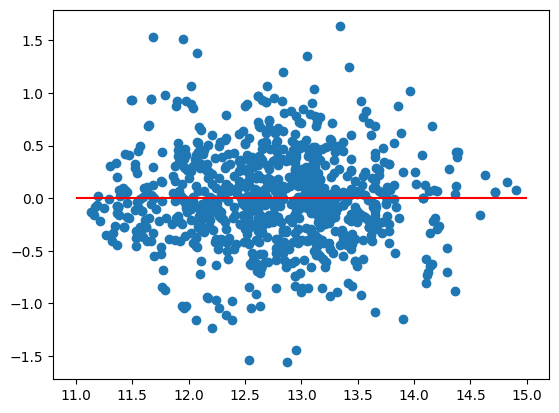

In [45]:
res=y_test-y_pred_xgb
plt.scatter(y_pred_xgb, res)
plt.hlines(y=0, color='r', xmin=11, xmax=15)

<Axes: xlabel='selling_price', ylabel='Density'>

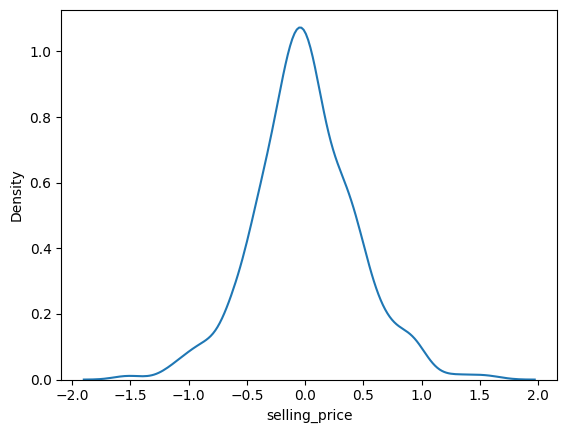

In [46]:
sns.kdeplot(res)

As we can see, the distribution of the residuals is normal which suggests that the model is able to learn well from the data. Comparing the cross validation scores of all the models, XGBoost is the final algorithm to train this model

In [49]:
import pickle
pickle.dump(xgb, open('model.pkl', 'wb'))